In [1]:
from skgstat import Variogram, OrdinaryKriging
import skgstat
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from adjustText import adjust_text

In [2]:
c_annotated = pd.read_csv('unique_mutations_country8_25_annotated.csv')
print(c_annotated.shape)
c_annotated.head()

(28326, 10)


,descriptor,0,1,2,3,counts,countries,infection_rate,fatality_rate,mutation
0,3037_3037_REF=C_ALT=T,3037,3037,REF=C,ALT=T,34658,92,907.881167,6.345666,NSP3 F924F/F106F
1,14408_14408_REF=C_ALT=T,14408,14408,REF=C,ALT=T,34657,92,909.982806,6.344732,RdRp P4715L/P323L
2,23403_23403_REF=A_ALT=G,23403,23403,REF=A,ALT=G,34654,91,908.281548,6.355905,S D614G
3,241_241_REF=C_ALT=T,241,241,REF=C,ALT=T,33888,92,890.082026,6.415056,NC 5UTR
4,25563_25563_REF=G_ALT=T,25563,25563,REF=G,ALT=T,12782,83,1255.394498,4.119031,ORF3a Q57H


In [3]:
#Remove low counts
threshold = 5
filt = c_annotated[c_annotated['counts']>threshold]

#Remove low countries
lower = 10
upper = 100
filt = filt[(filt['countries']>=lower) & (filt['countries']<=upper)]

#Normalize genome
filt['genome'] = filt.loc[:,'0']/29903

#Trim Ends
trim=50
filt = filt[filt['0']>trim]
filt = filt[filt['1']<29901-trim]

print(filt.shape)
print(filt.mean())
filt.head()

(324, 11)
0                 16806.064815
1                 16806.175926
counts              843.533951
countries            17.580247
infection_rate      765.168286
fatality_rate         5.905976
genome                0.562019
dtype: float64


,descriptor,0,1,2,3,counts,countries,infection_rate,fatality_rate,mutation,genome
0,3037_3037_REF=C_ALT=T,3037,3037,REF=C,ALT=T,34658,92,907.881167,6.345666,NSP3 F924F/F106F,0.101562
1,14408_14408_REF=C_ALT=T,14408,14408,REF=C,ALT=T,34657,92,909.982806,6.344732,RdRp P4715L/P323L,0.481825
2,23403_23403_REF=A_ALT=G,23403,23403,REF=A,ALT=G,34654,91,908.281548,6.355905,S D614G,0.782631
3,241_241_REF=C_ALT=T,241,241,REF=C,ALT=T,33888,92,890.082026,6.415056,NC 5UTR,0.008059
4,25563_25563_REF=G_ALT=T,25563,25563,REF=G,ALT=T,12782,83,1255.394498,4.119031,ORF3a Q57H,0.854864


### Various preliminary plots

65

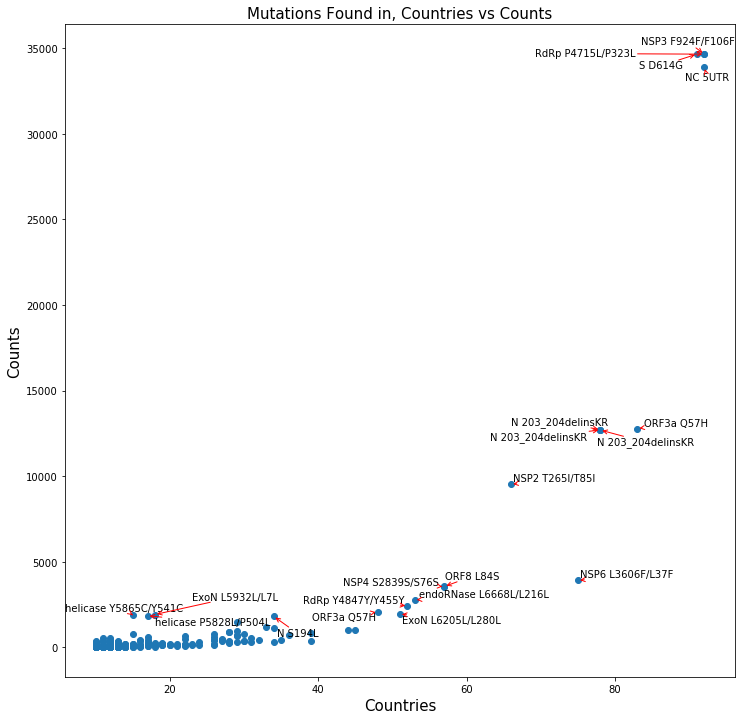

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
art = ax.scatter(filt['countries'],filt['counts'])#, s=50, c=country_infections['infection_rate'], cmap='plasma')
ax.set_xlabel('Countries',fontsize=15)
ax.set_ylabel('Counts',fontsize=15)
ax.set_title('Mutations Found in, Countries vs Counts',fontsize=15)

labeled = filt[~filt['mutation'].isna()]
x = labeled['countries'].values
y = labeled['counts'].values
label = labeled['mutation'].values
texts = []
for i, txt in enumerate(label):
    texts.append(ax.text(x[i],y[i],txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

Text(0, 0.5, 'Number of Countries')

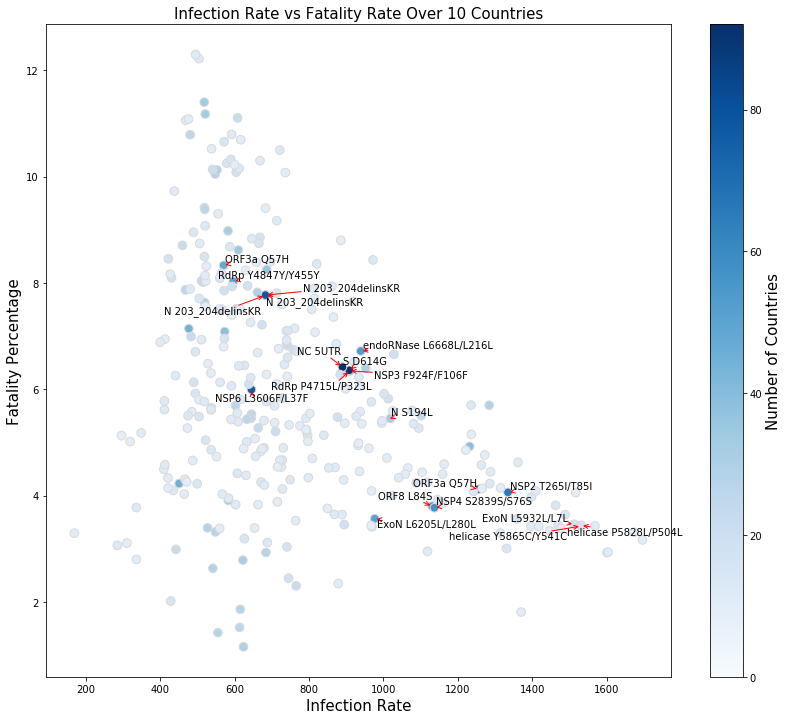

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
art = ax.scatter(filt['infection_rate'],filt['fatality_rate'], s=75, c=filt['countries'],cmap='Blues',edgecolors='0.85',vmin=0)
ax.set_xlabel('Infection Rate',fontsize=15)
ax.set_ylabel('Fatality Percentage',fontsize=15)
ax.set_title('Infection Rate vs Fatality Rate Over 10 Countries',fontsize=15)

labeled = filt[~filt['mutation'].isna()]
x = labeled['infection_rate'].values
y = labeled['fatality_rate'].values
label = labeled['mutation'].values
texts = []
for i, txt in enumerate(label):
    texts.append(ax.text(x[i],y[i],txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

# for i, txt in enumerate(label):
#     ax.annotate(txt, (x[i], y[i]))

cbar = plt.colorbar(art);
cbar.ax.set_ylabel('Number of Countries',fontsize=15)


Text(0, 0.5, 'Number of Countries')

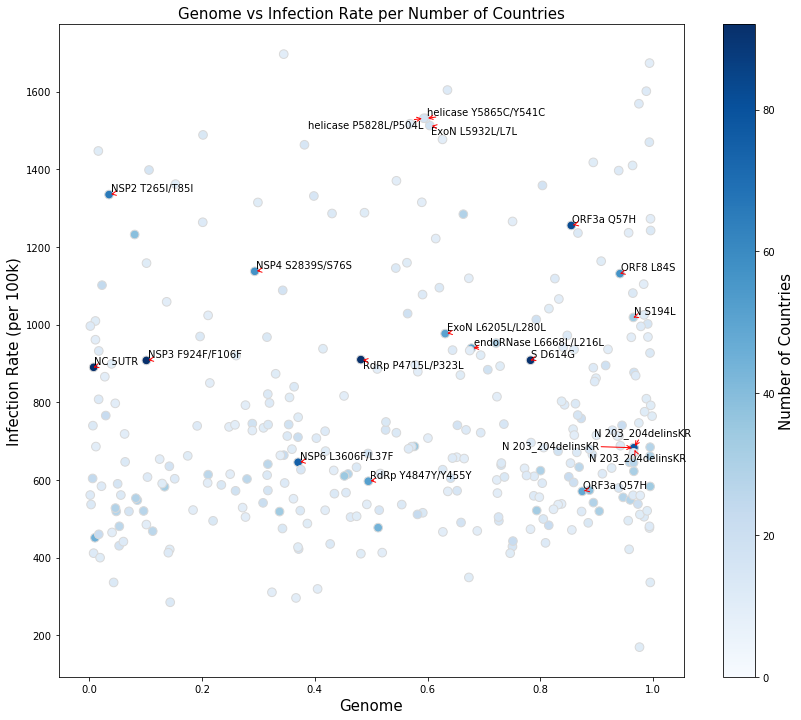

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
art = ax.scatter(filt['genome'],filt['infection_rate'],s=75, c=filt['countries'],cmap='Blues',edgecolors='0.85',vmin=0)
ax.set_xlabel('Genome',fontsize=15)
ax.set_ylabel('Infection Rate (per 100k)',fontsize=15)
ax.set_title('Genome vs Infection Rate per Number of Countries',fontsize=15)

labeled = filt[~filt['mutation'].isna()]
x = labeled['genome'].values
y = labeled['infection_rate'].values
label = labeled['mutation'].values
texts = []
for i, txt in enumerate(label):
    texts.append(ax.text(x[i],y[i],txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
cbar = plt.colorbar(art);
cbar.ax.set_ylabel('Number of Countries',fontsize=15)

### Z score and not z score

In [7]:
filt.head()

,descriptor,0,1,2,3,counts,countries,infection_rate,fatality_rate,mutation,genome
0,3037_3037_REF=C_ALT=T,3037,3037,REF=C,ALT=T,34658,92,907.881167,6.345666,NSP3 F924F/F106F,0.101562
1,14408_14408_REF=C_ALT=T,14408,14408,REF=C,ALT=T,34657,92,909.982806,6.344732,RdRp P4715L/P323L,0.481825
2,23403_23403_REF=A_ALT=G,23403,23403,REF=A,ALT=G,34654,91,908.281548,6.355905,S D614G,0.782631
3,241_241_REF=C_ALT=T,241,241,REF=C,ALT=T,33888,92,890.082026,6.415056,NC 5UTR,0.008059
4,25563_25563_REF=G_ALT=T,25563,25563,REF=G,ALT=T,12782,83,1255.394498,4.119031,ORF3a Q57H,0.854864


In [26]:
z_score = False
filt_z = filt.copy()

if z_score:
    filt_z.loc[:,'genome'] = (filt_z.loc[:,'genome'] - filt_z.loc[:,'genome'].mean())/filt_z.loc[:,'genome'].std()
    filt_z.loc[:,'infection_rate'] = (filt_z.loc[:,'infection_rate'] - filt_z.loc[:,'infection_rate'].mean())/filt_z.loc[:,'infection_rate'].std()
    filt_z.loc[:'fatality_rate'] = (filt_z.loc[:,'fatality_rate'] - filt_z.loc[:,'fatality_rate'].mean())/filt_z.loc[:,'fatality_rate'].std()
    
filt_z.loc[:,'infection_rate'] = (filt_z.loc[:,'infection_rate'] - filt_z.loc[:,'infection_rate'].min())/(filt_z.loc[:,'infection_rate'].max() - filt_z.loc[:,'infection_rate'].min())

Text(0, 0.5, 'Fatality Rate')

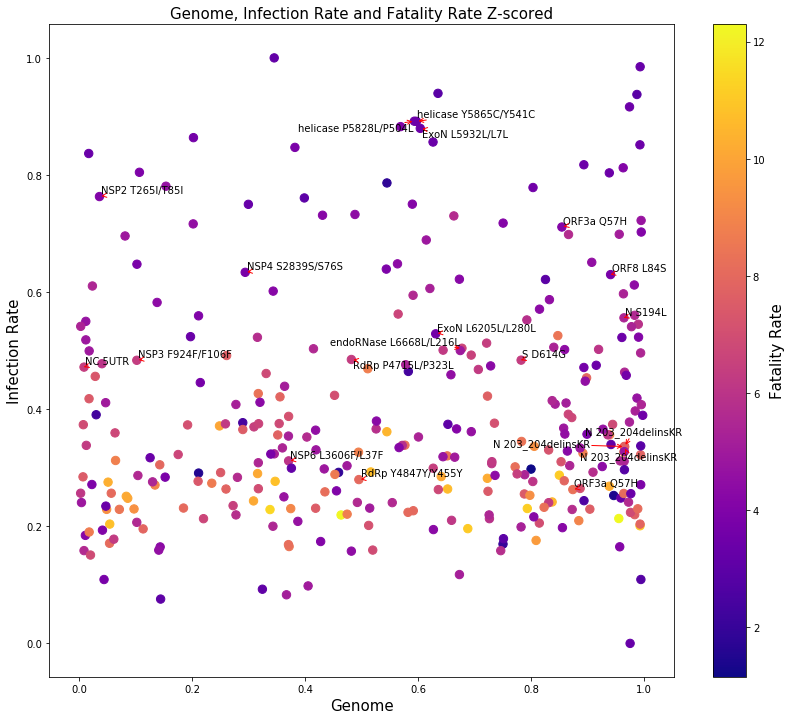

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
art = ax.scatter(filt_z['genome'],filt_z['infection_rate'], s=70, c=filt_z['fatality_rate'], cmap='plasma')

ax.set_xlabel('Genome',fontsize=15)
ax.set_ylabel('Infection Rate',fontsize=15)
ax.set_title('Genome, Infection Rate and Fatality Rate Z-scored',fontsize=15)

labeled = filt_z[~filt_z['mutation'].isna()]
x = labeled['genome'].values
y = labeled['infection_rate'].values
label = labeled['mutation'].values
texts = []
for i, txt in enumerate(label):
    texts.append(ax.text(x[i],y[i],txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
cbar = plt.colorbar(art);
cbar.ax.set_ylabel('Fatality Rate',fontsize=15)

{'name': 'spherical',
 'estimator': 'matheron',
 'effective_range': 0.17702363368630403,
 'sill': 4.258520041163346,
 'nugget': 0.9899996791400463}

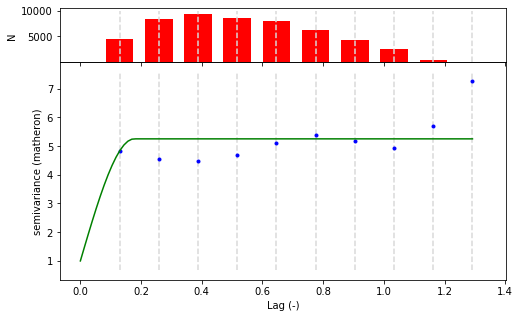

In [29]:
V=Variogram(filt_z[['genome','infection_rate']].values,filt_z['fatality_rate'].values,
           use_nugget=True,n_lags=10,normalize=False)
V.plot()
V.fit()
V.describe()

In [34]:
ok = OrdinaryKriging(V, min_points=0, max_points=15, mode='exact')
x_max,x_min = filt_z['genome'].max()+.25,filt_z['genome'].min()-.25
y_max,y_min = filt_z['infection_rate'].max()+.25,filt_z['infection_rate'].min()-.25

xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
s2 = ok.sigma.reshape(xx.shape)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 0

Text(0.5, 1, 'Genome, Infection Rate and Fatality Rate Z-scored')

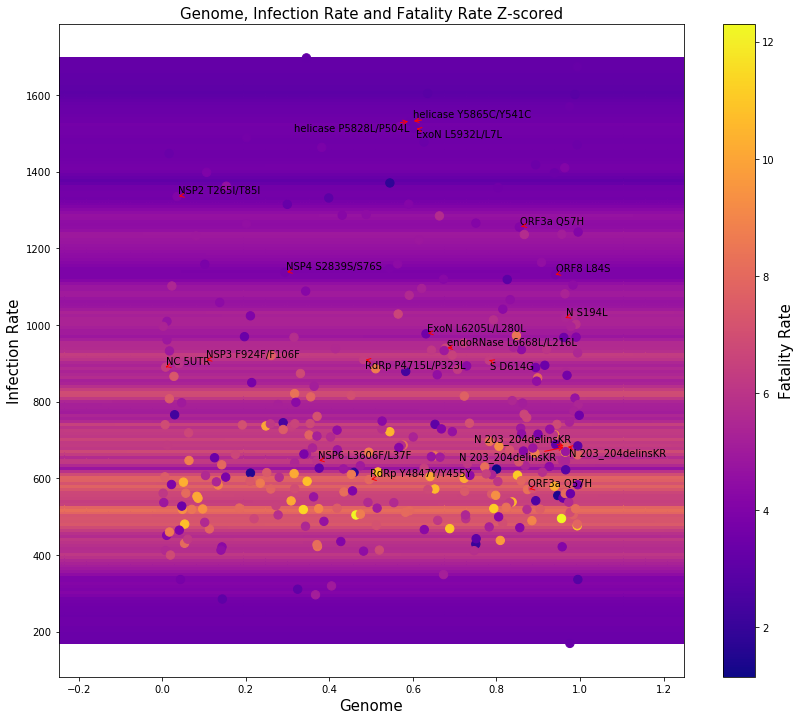

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(14, 12))
mi = np.min((field.min(),filt_z['fatality_rate'].min()))
ma = np.max((field.max(),filt_z['fatality_rate'].max()))
norm = matplotlib.colors.Normalize(vmin=mi,vmax=ma)

#plots
art = axes.pcolormesh(xx, yy, field, cmap='plasma', norm=norm)
axes.scatter(filt_z['genome'],filt_z['infection_rate'], s=70, c=filt_z['fatality_rate'], cmap='plasma', norm=norm)

#labels
labeled = filt_z[~filt_z['mutation'].isna()]
x = labeled['genome'].values
y = labeled['infection_rate'].values
label = labeled['mutation'].values
texts = []
for i, txt in enumerate(label):
    texts.append(axes.text(x[i],y[i],txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
cbar = plt.colorbar(art);
cbar.ax.set_ylabel('Fatality Rate',fontsize=15)

axes.set_xlabel('Genome',fontsize=15)
axes.set_ylabel('Infection Rate',fontsize=15)
axes.set_title('Genome, Infection Rate and Fatality Rate Z-scored',fontsize=15)